In [1]:
from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
 
import os
import matplotlib.pyplot as plt
import numpy as np
import math
 

Using TensorFlow backend.
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/myenv/lib/python3.7/site-pa

In [2]:
from keras.models import Sequential
from keras.applications import ResNet50

from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans

import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt

import glob

In [3]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [4]:
resnet_weights_path = '/Users/reejungkim/Documents/Git/pixellib_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [5]:
folder_path ='/Users/reejungkim/Downloads/images'

In [51]:
def extract_vector(path):
    resnet_feature_list = []

    for im in os.listdir(path) : #glob.glob(path):
        
        if im.endswith('jpg'):
            try:
                img = cv2.imread(path+"/" +im)
            #plt.imshow(im)
                img = cv2.resize(img,(224,224))
                img = preprocess_input(np.expand_dims( img.copy(), axis=0)) 
            
            
                resnet_feature = my_new_model.predict(img)
                resnet_feature_np = np.array(resnet_feature)
                resnet_feature_list.append(resnet_feature_np.flatten())
            except:
                print(path+"/" +im)
                pass 
    return np.array(resnet_feature_list)

In [43]:
folder_path

'/Users/reejungkim/Downloads/images'

extract_vector(folder_path)

In [52]:
array = extract_vector(folder_path)

/Users/reejungkim/Downloads/images/Egyptian_Mau_177.jpg
/Users/reejungkim/Downloads/images/Egyptian_Mau_139.jpg
/Users/reejungkim/Downloads/images/Abyssinian_34.jpg
/Users/reejungkim/Downloads/images/Egyptian_Mau_191.jpg
/Users/reejungkim/Downloads/images/Egyptian_Mau_145.jpg


In [54]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(array)
print(kmeans.labels_)

[ 2  3 27 ...  9 28 29]


In [55]:
clusters = kmeans.fit_predict(array)

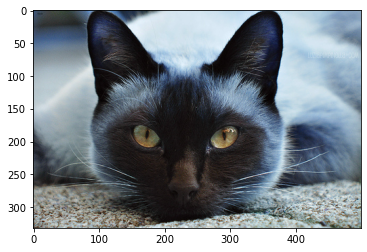

0


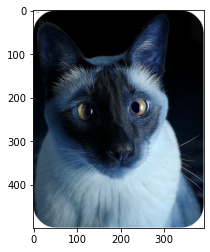

0


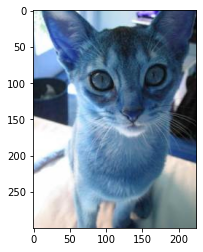

0


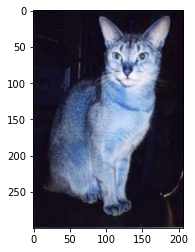

0


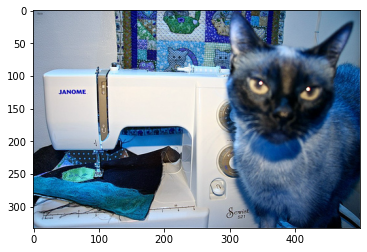

0


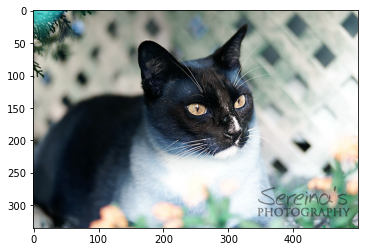

0


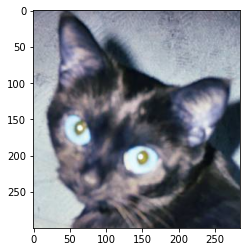

0


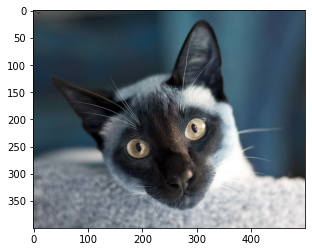

0


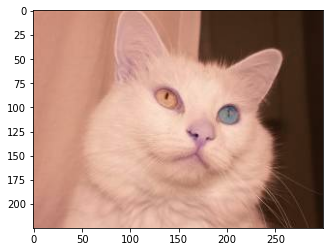

0


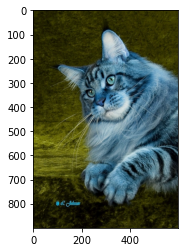

0


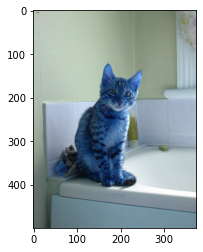

0


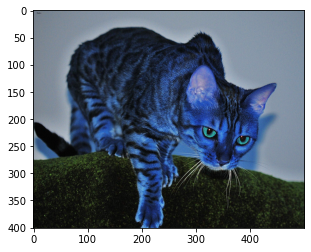

0


In [58]:
i = 0 
for im in os.listdir(folder_path)[:100]:
    if im.endswith('jpg'):
        if kmeans.labels_[i]==0:
            image = cv2.imread(folder_path+'/' +im)
            plt.imshow(image)
            plt.show()
            print(kmeans.labels_[i])
    i+=1 

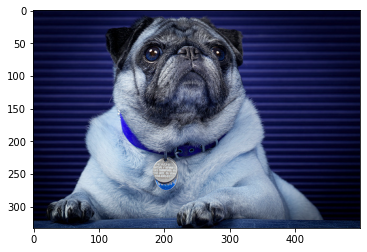

2


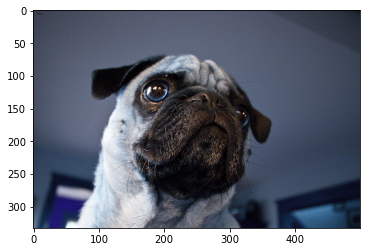

2


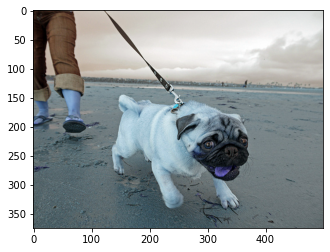

2


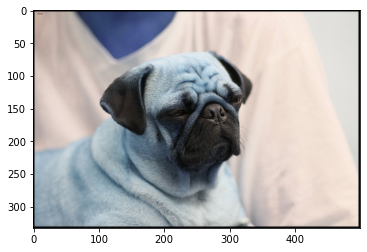

2


In [59]:
i = 0 
for im in os.listdir(folder_path)[:100]:
    if im.endswith('jpg'):
        if kmeans.labels_[i]==2:
            image = cv2.imread(folder_path+'/' +im)
            plt.imshow(image)
            plt.show()
            print(kmeans.labels_[i])
    i+=1 

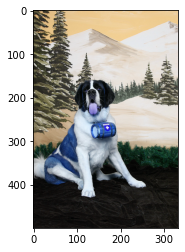

25


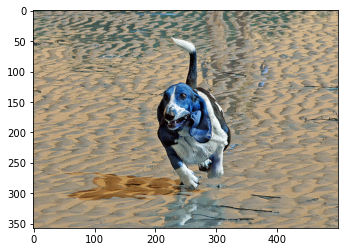

25


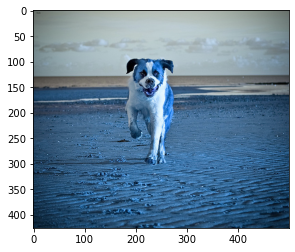

25


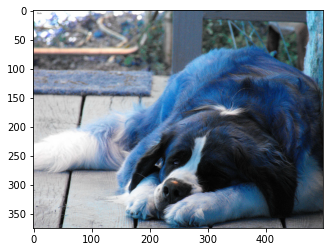

25


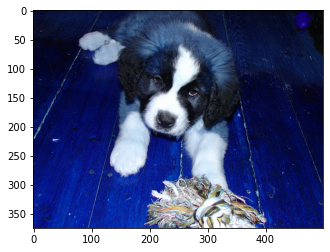

25


In [57]:
i = 0 
for im in os.listdir(folder_path)[:100]:
    if im.endswith('jpg'):
        if kmeans.labels_[i]==25:
            image = cv2.imread(folder_path+'/' +im)
            plt.imshow(image)
            plt.show()
            print(kmeans.labels_[i])
    i+=1 
        

import shap
masker = shap.maskers.Image("blur(28,28)", array.shape)
explainer = shap.Explainer(kmeans, masker, output_names=class_labels)

shap_values = explainer(array, outputs=shap.Explanation.argsort.flip[:5])

shap.image_plot(shap_values)